In [16]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

In [17]:
non_perturbed_dataset = 'standard'
datasets = [
    'rotated'
] 
noise_pcts = [10,20,30,40,50,60,70,80,90,100]
FONT_SIZE=14
TICK_FONT_SIZE=14
mpl.rcParams['xtick.labelsize'] = TICK_FONT_SIZE
mpl.rcParams['ytick.labelsize'] = TICK_FONT_SIZE

In [18]:
def get_weight_penalty_ratios(net_type, dataset, key='correct'):
    def format_pct(x):
        return math.floor(x*100)
    ratios = []
    std_errs = []
    
    # get standard
    std_ratios = json.loads(open('../weight_penalty_ratios/'+net_type+'/standard.json').read())
    ratios.append(format_pct(std_ratios['noise_pct_0'][key]['mean_penalty_ratio']))
    std_errs.append(std_ratios['noise_pct_0'][key]['std_err'])
    pct_ratios = json.loads(open('../weight_penalty_ratios/'+net_type+'/'+dataset+'.json').read())
    for n in noise_pcts:
        ratios.append(format_pct(pct_ratios['noise_pct_'+str(n)][key]['mean_penalty_ratio']))
        std_errs.append(pct_ratios['noise_pct_'+str(n)][key]['std_err']*100)
    return ratios, std_errs

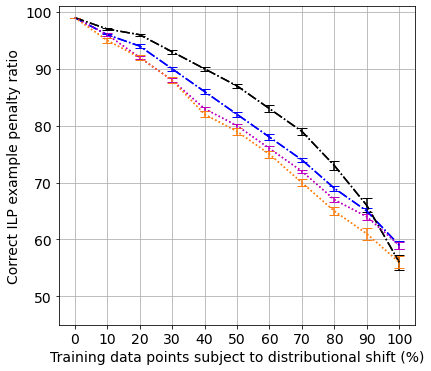

In [19]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])

axes = [f2_ax1]

nps_x = [0]+noise_pcts
for i in range(1):
    # Softmax
    softmax_ratios, softmax_err = get_weight_penalty_ratios('softmax', datasets[i])
    axes[i].plot(nps_x, softmax_ratios, label = "FF-NSL Softmax (with NN penalties)", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, softmax_ratios, yerr=softmax_err, color="b", capsize=5,linestyle='-.')
    
    # EDL-GEN
    edl_gen_ratios, edl_gen_err = get_weight_penalty_ratios('edl_gen', datasets[i])
    axes[i].plot(nps_x, edl_gen_ratios, label = "FF-NSL EDL-GEN (with NN penalties)", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, edl_gen_ratios, yerr=edl_gen_err, color="k", capsize=5,linestyle='-.')
        
    # Constant
    constant_ratios, constant_err = get_weight_penalty_ratios('softmax', datasets[i], 'constant_correct')
    axes[i].plot(nps_x, constant_ratios, label = "FF-NSL Softmax (with constant penalties)", color="m", linestyle=':')
    axes[i].errorbar(nps_x, constant_ratios, yerr=constant_err, color="m", capsize=5,linestyle=':')
    
    constant_ratios, constant_err = get_weight_penalty_ratios('edl_gen', datasets[i], 'constant_correct')
    axes[i].plot(nps_x, constant_ratios, label = "FF-NSL EDL-GEN (with constant penalties)", color="tab:orange", linestyle=':')
    axes[i].errorbar(nps_x, constant_ratios, yerr=constant_err, color="tab:orange", capsize=5,linestyle=':')
    
    legend = axes[i].legend(bbox_to_anchor=(1.05, 1.12), fontsize=9,ncol=2, borderaxespad=0, )

    def export_legend(legend, filename="sudoku_4x4_nn_penalties_legend.pdf", expand=[-5,-5,5,5]):
        fig  = legend.figure
        fig.canvas.draw()
        bbox  = legend.get_window_extent()
        bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
        bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
        fig.savefig(filename, dpi="figure", bbox_inches=bbox, format='pdf')
    
    
    axes[i].set_xticks([0,10,20,30,40,50,60,70,80,90,100])
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training data points subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Correct ILP example penalty ratio', fontsize=FONT_SIZE)
    axes[i].grid(True)
    axes[i].set_ylim([45,101])
# plt.legend(loc="best")
export_legend(legend)
axes[i].get_legend().remove()

plt.savefig('sudoku_4x4_weight_penalty_ratio_0_100_results.pdf', format='pdf', bbox_inches='tight')
plt.show()

# 80-96% - 50 repeats

In [20]:
def get_weight_penalty_ratios_80_96(net_type, dataset, key='correct'):
    def format_pct(x):
        return math.floor(x*100)
    ratios = []
    std_errs = []
    
    pct_ratios = json.loads(open('../weight_penalty_ratios/'+net_type+'/'+dataset+'_more_repeats.json').read())
    for n in [80,85,90,95,96]:
        ratios.append(format_pct(pct_ratios['noise_pct_'+str(n)][key]['mean_penalty_ratio']))
        std_errs.append(pct_ratios['noise_pct_'+str(n)][key]['std_err']*100)
    return ratios, std_errs

In [21]:
def get_pct_symbolic_perturbs_50_repeats(net_type, deck):
    def format_pct(x):
        return math.floor(x*100)
    pcts = []
    # get standard
    pct_symbolic_perturbs = json.loads(open('../mislabelled_example_analysis/'+net_type+'/'+deck+'_more_repeats.json').read())
    pct_symbolic_perturbs_85 = json.loads(open('../mislabelled_example_analysis/'+net_type+'/'+deck+'_more_repeats_85_pct.json').read())

    for n in [80,85,90,95,96]:
        if n == 85:
            pcts.append(format_pct(pct_symbolic_perturbs_85['noise_pct_'+str(n)]['pct_incorrect_examples']))
        else:
            pcts.append(format_pct(pct_symbolic_perturbs['noise_pct_'+str(n)]['pct_incorrect_examples']))
    return pcts

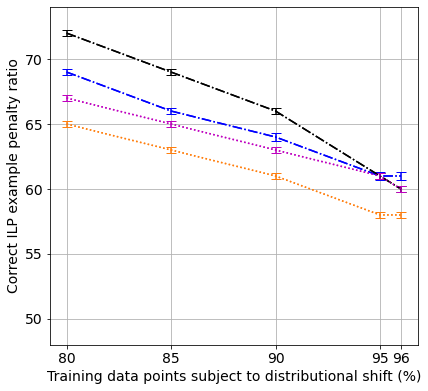

In [22]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])

axes = [f2_ax1]

nps_x = [80,85,90,95,96]
for i in range(1):
    # Softmax
    softmax_ratios, softmax_err = get_weight_penalty_ratios_80_96('softmax', datasets[i])
    axes[i].plot(nps_x, softmax_ratios, label = "FF-NSL Softmax (with NN penalties)", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, softmax_ratios, yerr=softmax_err, color="b", capsize=5,linestyle='-.')
    
    # EDL-GEN
    edl_gen_ratios, edl_gen_err = get_weight_penalty_ratios_80_96('edl_gen', datasets[i])
    axes[i].plot(nps_x, edl_gen_ratios, label = "FF-NSL EDL-GEN (with NN penalties)", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, edl_gen_ratios, yerr=edl_gen_err, color="k", capsize=5,linestyle='-.')
        
    # Constant
    constant_ratios, constant_err = get_weight_penalty_ratios_80_96('softmax', datasets[i], 'constant_correct')
    axes[i].plot(nps_x, constant_ratios, label = "Softmax preds and constant penalty", color="m", linestyle=':')
    axes[i].errorbar(nps_x, constant_ratios, yerr=constant_err, color="m", capsize=5,linestyle=':')
    
    constant_ratios, constant_err = get_weight_penalty_ratios_80_96('edl_gen', datasets[i], 'constant_correct')
    axes[i].plot(nps_x, constant_ratios, label = "EDL-GEN preds and constant penalty", color="tab:orange", linestyle=':')
    axes[i].errorbar(nps_x, constant_ratios, yerr=constant_err, color="tab:orange", capsize=5,linestyle=':')
    
    # Twin Axes to denote pct symbolic perturbations
#     pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs_50_repeats('softmax', datasets[i])
#     pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs_50_repeats('edl_gen', datasets[i])
#     ax2 = axes[i].twiny()
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training data points subject to distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Correct ILP example penalty ratio', fontsize=FONT_SIZE)
    axes[i].grid(True)
    axes[i].set_ylim([48,74])
    
#     ax2.set_xticks(nps_x)
#     ax2.set_xticklabels(pct_symbolic_perturbs_softmax)
#     ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax2.spines['bottom'].set_position(('outward', 45))
#     ax2.set_xlabel('Incorrect generated ILP examples, FF-NSL Softmax (%)', fontsize=FONT_SIZE)
#     ax2.set_xlim(axes[i].get_xlim())

#     ax3 = axes[i].twiny()
#     ax3.set_xticks(nps_x)
#     ax3.set_xticklabels(pct_symbolic_perturbs_edl_gen)
#     ax3.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
#     ax3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
#     ax3.spines['bottom'].set_position(('outward', 90))
#     ax3.set_xlabel('Incorrect generated ILP examples, FF-NSL EDL-GEN (%)', fontsize=FONT_SIZE)
#     ax3.set_xlim(axes[i].get_xlim())

# plt.legend(loc="best")
plt.savefig('sudoku_4x4_weight_penalty_ratio_80_96_results.pdf', format='pdf', bbox_inches='tight')
plt.show()